In [155]:
import numpy as np
import pandas as pd
import numpy as np
import os

import math

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

from sklearn.model_selection import GridSearchCV
#from sklearn.cross_validation import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

In [119]:
FOLDER = '/Users/daphneliu/2019-2020/Helix Hacks/web-food-covid/'
#load data from csv
def load_data_from_csv(fileName, data_path=FOLDER):
    csv_path = os.path.join(data_path,fileName)
    return pd.read_csv(csv_path, low_memory=False,index_col=0)

#function to save a dataframe to csv
def save_data_to_csv(data,fileName, data_path=FOLDER):
    csv_path = os.path.join(data_path, fileName)
    data.to_csv(csv_path)

In [120]:
data = load_data_from_csv('Food_Supply_kcal_Data.csv')
data.head()

,Alcoholic Beverages,Animal Products,Animal fats,"Aquatic Products, Other",Cereals - Excluding Beer,Eggs,"Fish, Seafood",Fruits - Excluding Wine,Meat,Milk - Excluding Butter,...,Vegetable Oils,Vegetables,Obesity,Undernourished,Confirmed,Deaths,Recovered,Active,Population,Unit (all except Population)
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0.0000,4.7774,0.8504,0.0,37.1186,0.1501,0.0000,1.4757,1.2006,2.4512,...,2.3012,0.7504,4.5,29.8,0.094302,0.003298,0.065531,0.025473,38928000.0,%
Albania,0.9120,16.0930,1.0591,0.0,16.2107,0.8091,0.1471,3.8982,3.8688,9.9441,...,2.8244,2.7508,22.3,6.2,0.194468,0.005849,0.106342,0.082276,2838000.0,%
Algeria,0.0896,6.0326,0.1941,0.0,25.0112,0.4181,0.1195,3.1805,1.2543,3.9869,...,5.7638,2.0457,26.6,3.9,0.070936,0.002775,0.048288,0.019873,44357000.0,%
Angola,1.9388,4.6927,0.2644,0.0,18.3521,0.0441,0.8372,2.3133,2.9302,0.5067,...,4.2741,0.3525,6.8,25,0.003687,0.000169,0.001418,0.002100,32522000.0,%
Antigua and Barbuda,2.3041,15.3672,1.5429,0.0,13.7215,0.2057,1.7280,3.6824,7.0356,4.6904,...,4.6904,1.2960,19.1,NaN,0.092857,0.003061,0.068367,0.021429,98000.0,%


In [121]:
data.columns

Index(['Alcoholic Beverages', 'Animal Products', 'Animal fats',
       'Aquatic Products, Other', 'Cereals - Excluding Beer', 'Eggs',
       'Fish, Seafood', 'Fruits - Excluding Wine', 'Meat',
       'Milk - Excluding Butter', 'Miscellaneous', 'Offals', 'Oilcrops',
       'Pulses', 'Spices', 'Starchy Roots', 'Stimulants', 'Sugar Crops',
       'Sugar & Sweeteners', 'Treenuts', 'Vegetal Products', 'Vegetable Oils',
       'Vegetables', 'Obesity', 'Undernourished', 'Confirmed', 'Deaths',
       'Recovered', 'Active', 'Population', 'Unit (all except Population)'],
      dtype='object')

In [64]:
#data_complete = data.copy().drop(['Obesity', 'Undernourished', 'Deaths',
       #'Recovered', 'Active', 'Population', 'Unit (all except Population)'], axis = 1)

In [122]:

cols = ['Meat', 'Fish, Seafood', 'Milk - Excluding Butter', 'Eggs',
        'Starchy Roots', 'Sugar & Sweeteners', 'Fruits - Excluding Wine', 'Vegetables', 'Treenuts', 
        'Alcoholic Beverages', 'Confirmed']

data_complete = data[cols]


In [123]:
data_complete.head()

,Meat,"Fish, Seafood",Milk - Excluding Butter,Eggs,Starchy Roots,Sugar & Sweeteners,Fruits - Excluding Wine,Vegetables,Treenuts,Alcoholic Beverages,Confirmed
Country,,,,,,,,,,,
Afghanistan,1.2006,0.0000,2.4512,0.1501,0.3252,2.2261,1.4757,0.7504,0.1251,0.0000,0.094302
Albania,3.8688,0.1471,9.9441,0.8091,1.2651,3.4422,3.8982,2.7508,0.3972,0.9120,0.194468
Algeria,1.2543,0.1195,3.9869,0.4181,1.9262,3.9869,3.1805,2.0457,0.2240,0.0896,0.070936
Angola,2.9302,0.8372,0.5067,0.0441,12.6239,2.7539,2.3133,0.3525,0.0000,1.9388,0.003687
Antigua and Barbuda,7.0356,1.7280,4.6904,0.2057,0.8434,5.8218,3.6824,1.2960,0.0823,2.3041,0.092857


In [124]:
data_complete.isnull().sum()

Meat                       0
Fish, Seafood              0
Milk - Excluding Butter    0
Eggs                       0
Starchy Roots              0
Sugar & Sweeteners         0
Fruits - Excluding Wine    0
Vegetables                 0
Treenuts                   0
Alcoholic Beverages        0
Confirmed                  9
dtype: int64

In [125]:
data_complete[data_complete['Confirmed'].isnull()].index.tolist()

['French Polynesia',
 'Kiribati',
 'Korea, North',
 'Myanmar',
 'New Caledonia',
 'Samoa',
 'Solomon Islands',
 'Turkmenistan',
 'Vanuatu']

In [126]:
data_complete.shape

(170, 11)

In [127]:
data_complete = data_complete.drop(['French Polynesia',
 'Kiribati',
 'Korea, North',
 'Myanmar',
 'New Caledonia',
 'Samoa',
 'Solomon Islands',
 'Turkmenistan',
 'Vanuatu'])

In [128]:
data_complete[data_complete['Confirmed'].isnull()].index.tolist()

[]

In [132]:
data_complete.columns

Index(['Meat', 'Fish, Seafood', 'Milk - Excluding Butter', 'Eggs',
       'Starchy Roots', 'Sugar & Sweeteners', 'Fruits - Excluding Wine',
       'Vegetables', 'Treenuts', 'Alcoholic Beverages', 'Confirmed'],
      dtype='object')

In [133]:
data_complete.reset_index(drop=True, inplace=True)

In [134]:
np.corrcoef(data['Alcoholic Beverages'], data['Confirmed'])

array([[ 1., nan],
       [nan, nan]])

# Data Exploration

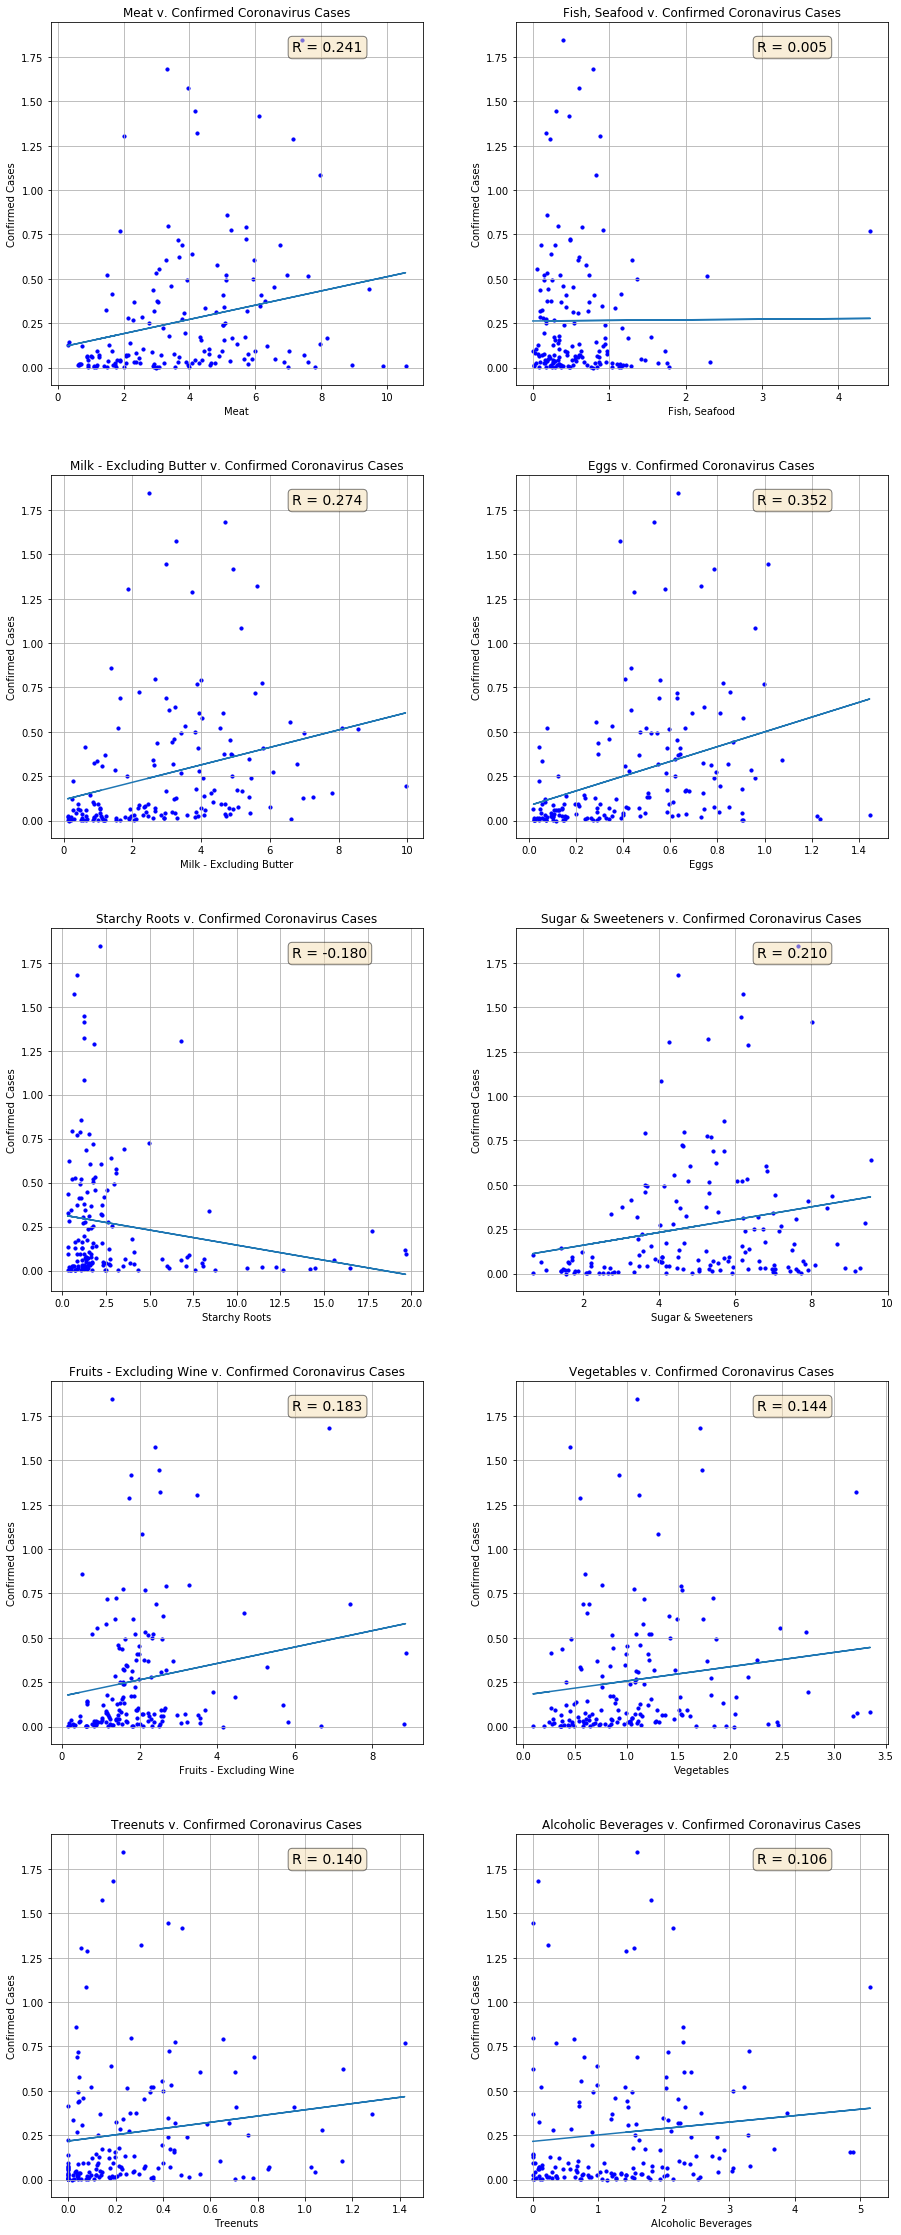

In [144]:
fig, axes = plt.subplots(nrows=5, ncols=2, sharey=False, figsize=(15,40))
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.25, hspace=0.25)
coeffs = []

for ax, feature in zip(axes.flat, data_complete.columns):
    ax.scatter(data_complete[feature], data_complete.Confirmed,s=10, c='b', marker="o")
    ax.set_title("%s v. Confirmed Coronavirus Cases"%feature)
    ax.grid(True)
    ax.set_xlabel(feature)
    ax.set_ylabel('Confirmed Cases')
    corr = np.corrcoef(data_complete[feature], data_complete.Confirmed)
    coeffs.append(corr[0][1])
    
    m, b = np.polyfit(data_complete[feature], data_complete['Confirmed'], 1)
    ax.plot(data_complete[feature], m*data_complete[feature] + b)
    
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper left in axes coords
    ax.text(0.65, 0.95, "R = %.3f"%corr[0][1], transform=ax.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

In [74]:
def plot_scatter(feature):
    plt.scatter(data_complete[feature], data_complete['Confirmed'])
    plt.xticks(rotation=25)
    plt.title("Relationship between %s and confirmed coronavirus cases"%feature, fontsize=20)
    plt.xlabel("Age", fontsize = 12)
    plt.ylabel("Value", fontsize=12)
    
    m, b = np.polyfit(data_complete[feature], data_complete['Confirmed'], 1)
    plt.plot(data_complete[feature], m*data_complete[feature] + b)
    plt.show()

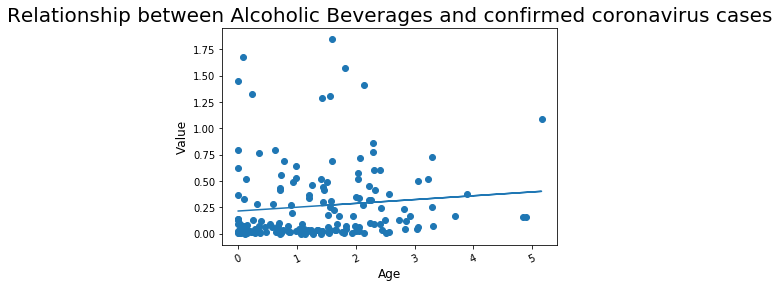

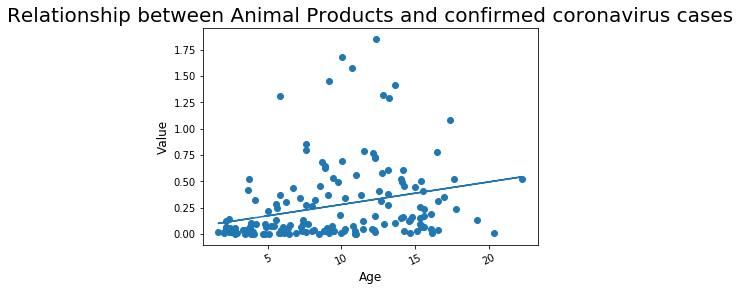

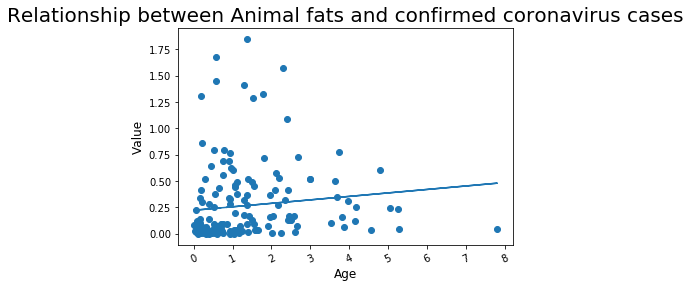

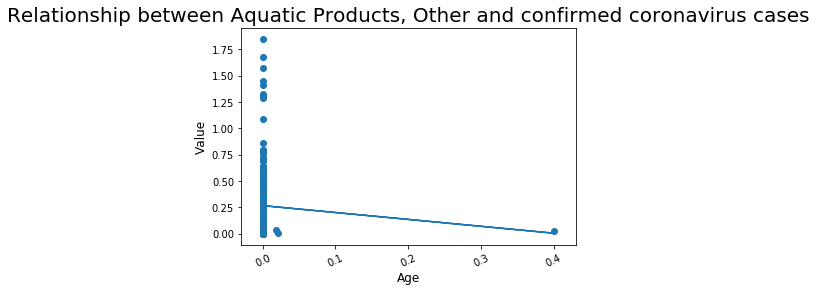

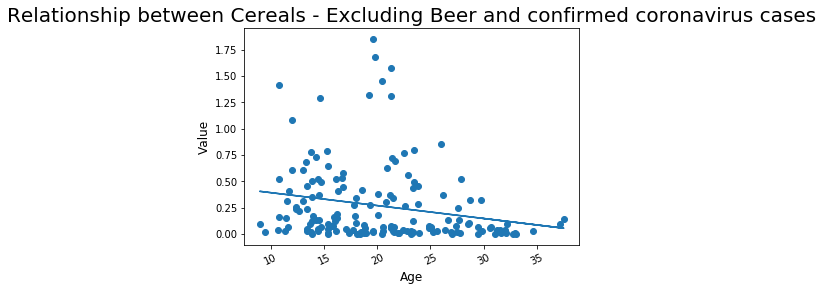

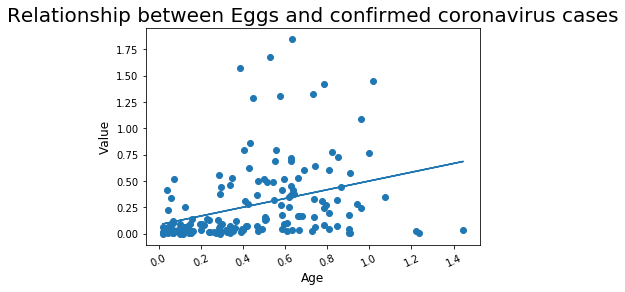

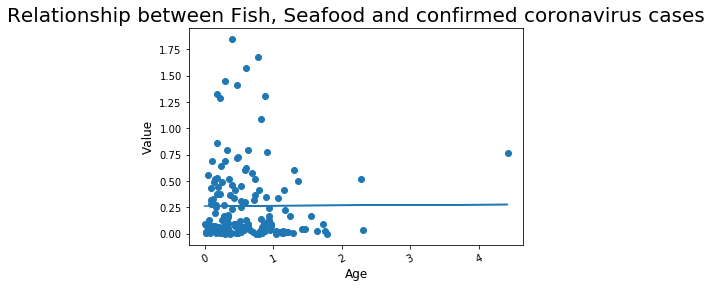

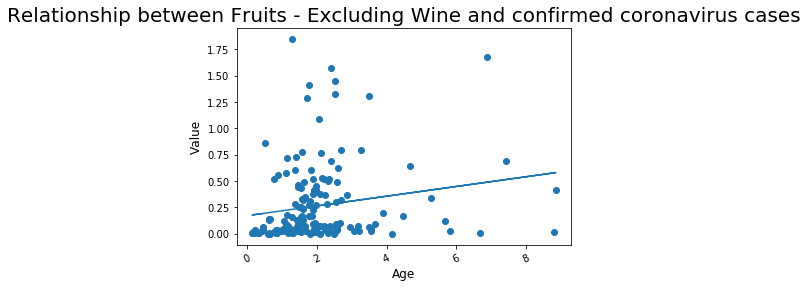

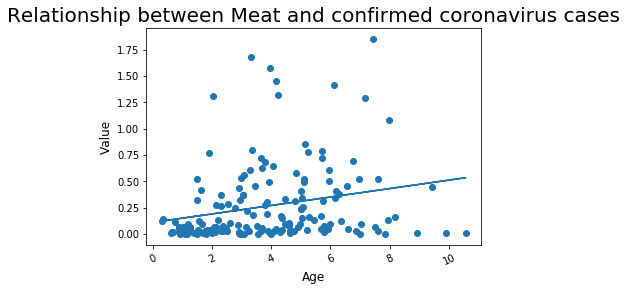

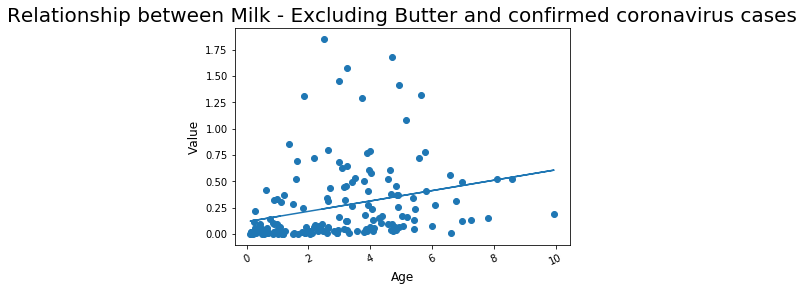

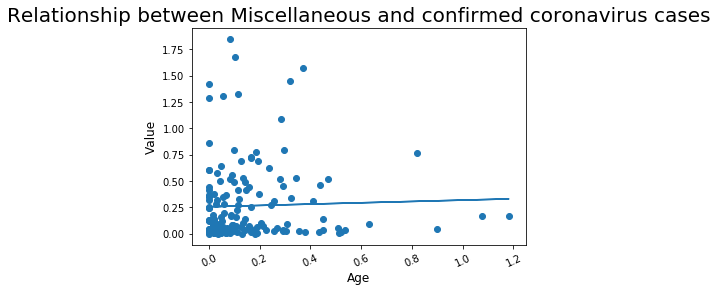

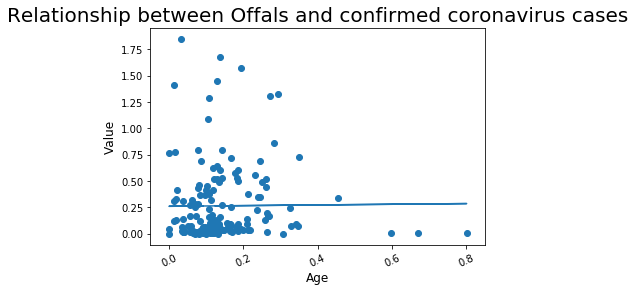

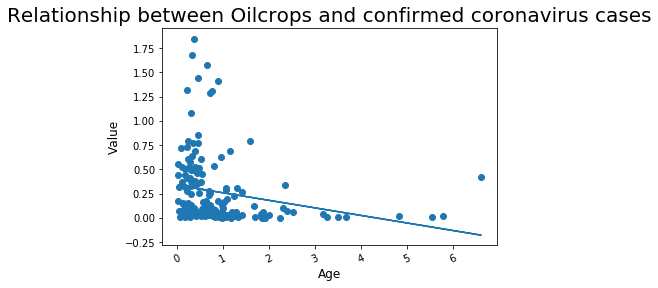

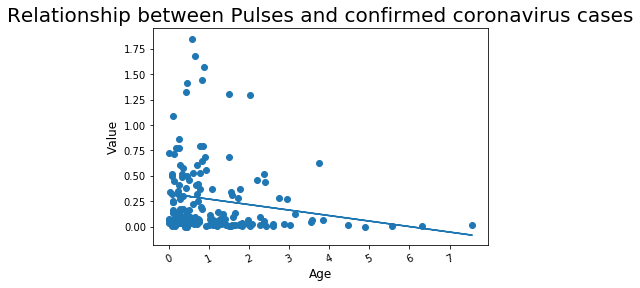

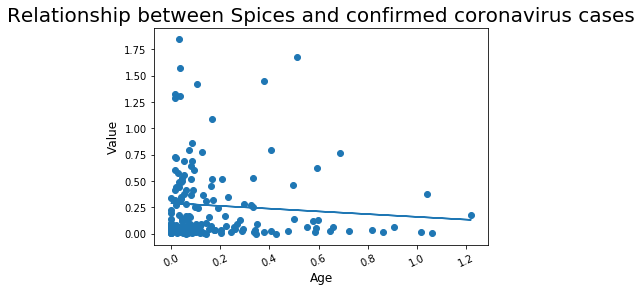

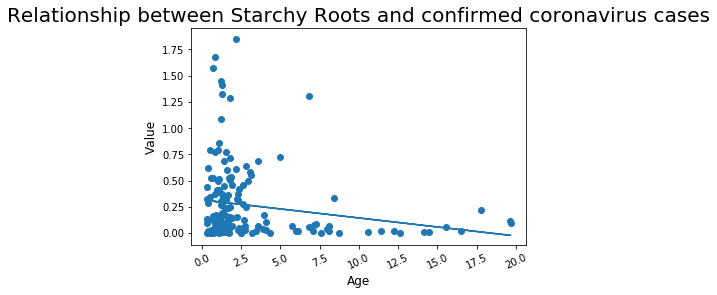

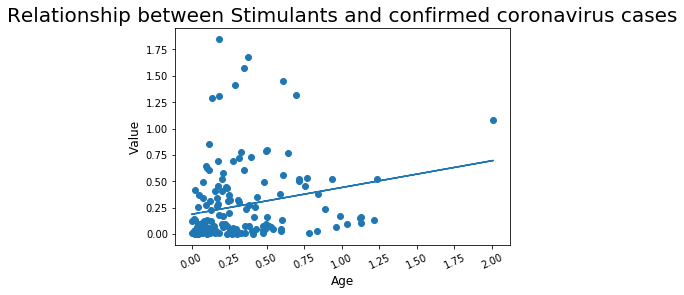

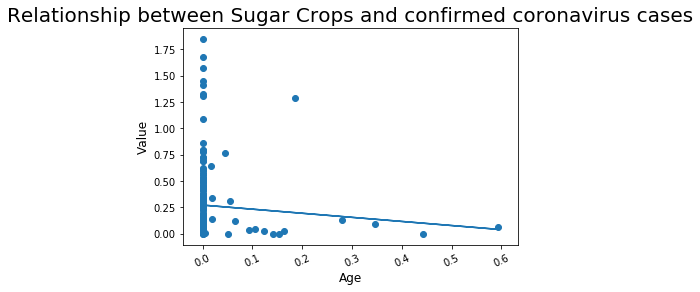

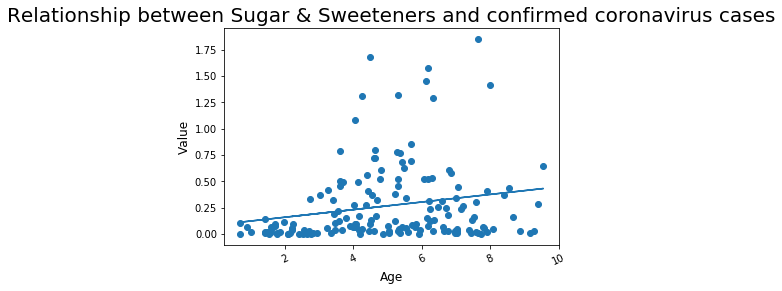

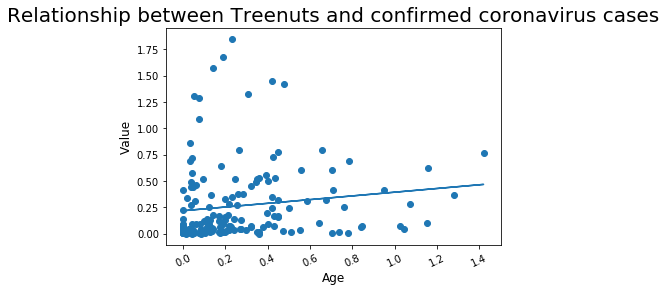

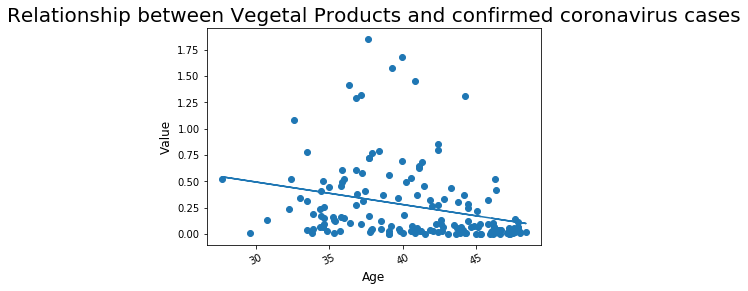

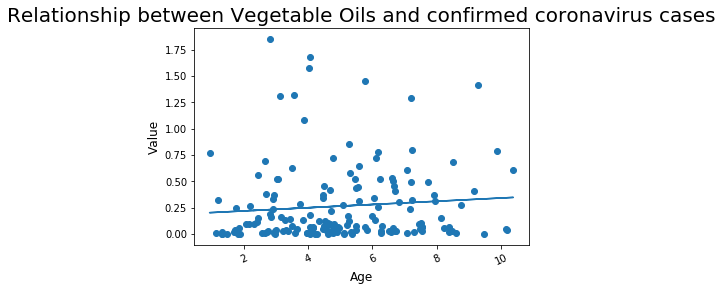

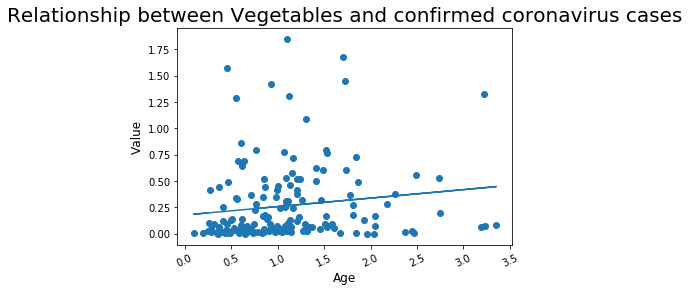

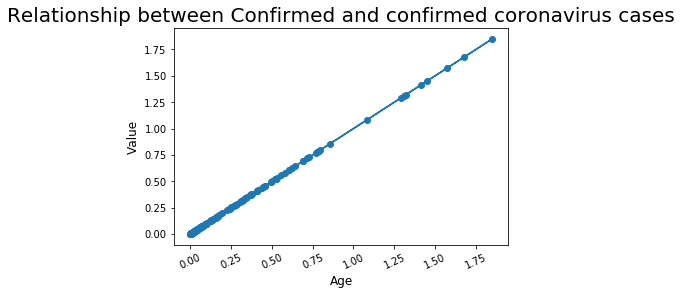

In [75]:
for feature in data_complete.columns:
    plot_scatter(feature)

In [145]:
X = data_complete.copy().drop(['Confirmed'], axis = 1)
X.head()

,Meat,"Fish, Seafood",Milk - Excluding Butter,Eggs,Starchy Roots,Sugar & Sweeteners,Fruits - Excluding Wine,Vegetables,Treenuts,Alcoholic Beverages
0,1.2006,0.0000,2.4512,0.1501,0.3252,2.2261,1.4757,0.7504,0.1251,0.0000
1,3.8688,0.1471,9.9441,0.8091,1.2651,3.4422,3.8982,2.7508,0.3972,0.9120
2,1.2543,0.1195,3.9869,0.4181,1.9262,3.9869,3.1805,2.0457,0.2240,0.0896
3,2.9302,0.8372,0.5067,0.0441,12.6239,2.7539,2.3133,0.3525,0.0000,1.9388
4,7.0356,1.7280,4.6904,0.2057,0.8434,5.8218,3.6824,1.2960,0.0823,2.3041


In [180]:
data_complete.columns

Index(['Meat', 'Fish, Seafood', 'Milk - Excluding Butter', 'Eggs',
       'Starchy Roots', 'Sugar & Sweeteners', 'Fruits - Excluding Wine',
       'Vegetables', 'Treenuts', 'Alcoholic Beverages', 'Confirmed'],
      dtype='object')

In [304]:
df = pd.DataFrame()
df['Coefficients'] = coeffs
df['Food'] = data_complete.columns.copy().drop(['Confirmed'])
#df.set_index(df['Food'], inplace=True)
#df = df.drop(['Food'], axis = 1)
df

,Coefficients,Food
0,0.240638,Meat
1,0.004890,"Fish, Seafood"
2,0.273512,Milk - Excluding Butter
3,0.352423,Eggs
4,-0.179924,Starchy Roots
5,0.209712,Sugar & Sweeteners
6,0.182807,Fruits - Excluding Wine
7,0.143923,Vegetables
8,0.140264,Treenuts
9,0.106463,Alcoholic Beverages


In [305]:
min(coeffs), max(coeffs)

(-0.17992412843877556, 0.35242282699158267)

In [306]:
thresh = (max(coeffs) - min(coeffs))/2
thresh

0.26617347771517913

In [307]:
df['High Risk'] = df['Coefficients'] > thresh

df

,Coefficients,Food,High Risk
0,0.240638,Meat,False
1,0.004890,"Fish, Seafood",False
2,0.273512,Milk - Excluding Butter,True
3,0.352423,Eggs,True
4,-0.179924,Starchy Roots,False
5,0.209712,Sugar & Sweeteners,False
6,0.182807,Fruits - Excluding Wine,False
7,0.143923,Vegetables,False
8,0.140264,Treenuts,False
9,0.106463,Alcoholic Beverages,False


In [308]:
df = df.drop(['Coefficients'], axis=1)

In [309]:
#merge data
df.join(data_complete.transpose(), on='Food').transpose()

,0,1,2,3,4,5,6,7,8,9
Food,Meat,"Fish, Seafood",Milk - Excluding Butter,Eggs,Starchy Roots,Sugar & Sweeteners,Fruits - Excluding Wine,Vegetables,Treenuts,Alcoholic Beverages
High Risk,False,False,True,True,False,False,False,False,False,False
0,1.2006,0,2.4512,0.1501,0.3252,2.2261,1.4757,0.7504,0.1251,0
1,3.8688,0.1471,9.9441,0.8091,1.2651,3.4422,3.8982,2.7508,0.3972,0.912
2,1.2543,0.1195,3.9869,0.4181,1.9262,3.9869,3.1805,2.0457,0.224,0.0896
...,...,...,...,...,...,...,...,...,...,...
156,3.1368,0.4449,2.6474,0.2892,1.3571,7.7864,2.3804,0.6674,0,0.8454
157,7.8311,1.0385,0.5618,0.2894,0.715,2.094,1.8046,1.9578,0.3575,0.715
158,2.0121,0.1697,0.6545,0.1455,0.3152,7.0303,1.1879,0.3636,0.0242,0
159,1.5155,0.5714,0.5217,0.1988,4.0994,2.559,0.2236,0.4472,0,1.1925


In [146]:
y = pd.DataFrame(data_complete['Confirmed'])
y.head()

,Confirmed
0,0.094302
1,0.194468
2,0.070936
3,0.003687
4,0.092857


In [147]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.25, random_state=25)

# Linear Regression

In [148]:
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [165]:
train_r2 = lin_reg.score(X_train, y_train)
test_r2 = lin_reg.score(X_test, y_test)
y_pred = lin_reg.predict(X_test)

train_mse = mean_squared_error(y_train, lin_reg.predict(X_train))
test_mse = mean_squared_error(y_test, lin_reg.predict(X_test))



print('Training mean squared error: %.2f' % train_mse)
print('Testing mean squared error: %.2f' % test_mse)
print(' ')
print('Training correlation coefficient, R: %.3f' % math.sqrt(abs(train_r2)))
print('Testing correlation coefficient, R: %.3f' % math.sqrt(abs(test_r2)))
print(" ")
print('Training coefficient of determination, R^2: %.3f' % train_r2)
print('Testing coefficient of determination, R^2: %.3f' % test_r2)


Training mean squared error: 0.08
Testing mean squared error: 0.24
 
Training correlation coefficient, R: 0.443
Testing correlation coefficient, R: 0.259
 
Training coefficient of determination, R^2: 0.196
Testing coefficient of determination, R^2: -0.067


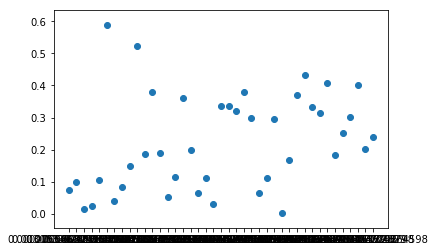

In [150]:
plt.scatter(y_test, y_pred)


# Lasso

In [160]:
lasso = Lasso()
parameters ={'alpha': [0.03, 0.05, 0.1, 0.5, 1]}
lasso_reg = GridSearchCV(lasso, parameters, scoring='r2', cv =10,refit=True, n_jobs=-1,verbose = 1,iid=True)

lasso_reg.fit(X_train, y_train)
print("Best: %f using %s" % (lasso_reg.best_score_, lasso_reg.best_params_))

Fitting 10 folds for each of 5 candidates, totalling 50 fits
Best: -0.009985 using {'alpha': 0.05}


[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.2s finished


In [166]:
train_r2 = lasso_reg.score(X_train, y_train)
test_r2 = lasso_reg.score(X_test, y_test)
y_pred = lasso_reg.predict(X_test)

train_mse = mean_squared_error(y_train, lasso_reg.predict(X_train))
test_mse = mean_squared_error(y_test, lasso_reg.predict(X_test))



print('Training mean squared error: %.2f' % train_mse)
print('Testing mean squared error: %.2f' % test_mse)
print(' ')
print('Training correlation coefficient, R: %.3f' % math.sqrt(abs(train_r2)))
print('Testing correlation coefficient, R: %.3f' % math.sqrt(abs(test_r2)))
print(" ")
print('Training coefficient of determination, R^2: %.3f' % train_r2)
print('Testing coefficient of determination, R^2: %.3f' % test_r2)


Training mean squared error: 0.09
Testing mean squared error: 0.24
 
Training correlation coefficient, R: 0.313
Testing correlation coefficient, R: 0.265
 
Training coefficient of determination, R^2: 0.098
Testing coefficient of determination, R^2: -0.070


# ElasticNet

In [170]:
elastic_net = ElasticNet()

parametersGrid ={'max_iter': [10, 15, 20], 'alpha': [0.1, 0.5, 1], 'l1_ratio': np.arange(0.001, 0.005, 0.01)}
elastic_net = GridSearchCV(elastic_net, parametersGrid, scoring='r2', cv =5,refit=True, n_jobs=-1,verbose = 1,iid=True)

elastic_net.fit(X_train, y_train)
print("Best: %f using %s" % (elastic_net.best_score_, elastic_net.best_params_))

Fitting 5 folds for each of 9 candidates, totalling 45 fits


/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of

Best: 0.045192 using {'alpha': 1, 'l1_ratio': 0.001, 'max_iter': 15}


[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:    0.1s finished


In [171]:
train_r2 = elastic_net.score(X_train, y_train)
test_r2 = elastic_net.score(X_test, y_test)
y_pred = elastic_net.predict(X_test)

train_mse = mean_squared_error(y_train, elastic_net.predict(X_train))
test_mse = mean_squared_error(y_test, elastic_net.predict(X_test))



print('Training mean squared error: %.2f' % train_mse)
print('Testing mean squared error: %.2f' % test_mse)
print(' ')
print('Training correlation coefficient, R: %.3f' % math.sqrt(abs(train_r2)))
print('Testing correlation coefficient, R: %.3f' % math.sqrt(abs(test_r2)))
print(" ")
print('Training coefficient of determination, R^2: %.3f' % train_r2)
print('Testing coefficient of determination, R^2: %.3f' % test_r2)


Training mean squared error: 0.08
Testing mean squared error: 0.23
 
Training correlation coefficient, R: 0.355
Testing correlation coefficient, R: 0.243
 
Training coefficient of determination, R^2: 0.126
Testing coefficient of determination, R^2: -0.059
